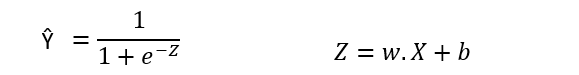

Y_hat --> predicted value

X --> Input Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

*Derivatives*

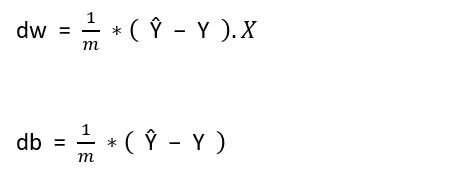

In [1]:
import numpy as np

In [8]:
class Logistic_Regression():
  # constructor
  # initiating the hyperparameters : learning rate and nomber of iterations
  def __init__(self, learning_rate, no_of_iteration):

    self.learning_rate = learning_rate
    self.no_of_iteration = no_of_iteration

  # fit function to train the model with x_train and y_train
  def fit(self, X, Y):

    self.m, self.n = X.shape # X ime output/label nhi hona chahiye : m=number of datapoints(rows) and n= number of columns in x_train

    # initiating weights and bias
    self.w = np.zeros(self.n) # number of weights = number of features, shi bat hai. so w is numpy array, not single value
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing gradient descent : hr bar minimum loss function ki taraf model jayega. Chahe minima bhi aa jaye, aage converge/continue krne pr it won't change much, because of gradient descent.
    for i in range( self.no_of_iterationn):
      self.update_weights()

  def update_weights(self):
    y_hat = 1/(1+np.exp(-(self.X.dot(self.w)+self.b))) # w*x+b ; w and b are arrays, not single elements
    # for example z = b + w0.x0 + w1.x1 + w2.x2 + w3.x3 + ..... w_n.x_n : this is dot product of two matrices w and X i.e. x_test

    # derivatives
    dw = (1/self.m)*np.dot(self.X.T , (y_hat - self.Y) ) # w is intact 1*n matrix, while x was m*n , but dot product ke liye n*m kiya. Now 1*n se n*m ka product is possible
    db = (1/self.m)*np.sum(y_hat - self.Y)

    # uddating the rates and bias using the gradient descent function
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  # Sigmoid equation and decision boundry
  def predict(self, X):
    y_pred =  1/(1+np.exp(-(X.dot(self.w)+self.b)))
    y_pred = np.where( y_pred>0.5 , 1, 0)
    return y_pred


In this code please envolve loop termination condition, where the iterations should be stopped when minima is reached of loss function. There is not much change in model after this point as gradient descent has reached to minima of loss function

In [9]:
import numpy as np

class Logistic_Regression():
  # constructor
  # initiating the hyperparameters : learning rate and number of iterations
  def __init__(self, learning_rate, no_of_iterations, tolerance=1e-4):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.tolerance = tolerance

  # fit function to train the model with X_train and Y_train
  def fit(self, X, Y):
    self.m, self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y
    prev_loss = float('inf')  # Set initial loss to positive infinity

    for i in range(self.no_of_iterations):
        loss = self.compute_loss()
        if abs(prev_loss - loss) < self.tolerance:
            break  # Stop if the change in loss is small
        self.update_weights()
        prev_loss = loss

  def update_weights(self):
    y_hat = 1 / (1 + np.exp(-(self.X.dot(self.w) + self.b)))
    dw = (1 / self.m) * np.dot(self.X.T, (y_hat - self.Y))
    db = (1 / self.m) * np.sum(y_hat - self.Y)
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def compute_loss(self):
    y_hat = 1 / (1 + np.exp(-(self.X.dot(self.w) + self.b)))
    loss = -np.mean(self.Y * np.log(y_hat) + (1 - self.Y) * np.log(1 - y_hat))
    return loss

  # Sigmoid equation and decision boundary
  def predict(self, X):
    y_pred = 1 / (1 + np.exp(-(X.dot(self.w) + self.b)))
    y_pred = np.where(y_pred > 0.5, 1, 0)
    return y_pred




In [7]:
# let's use our model created from scretch, to predict the results

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [12]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [13]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
# separating the data and labels
features = diabetes_dataset.drop(columns = 'Outcome', axis=1)
target = diabetes_dataset['Outcome']

In [16]:
print(features)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [17]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(features)

StandardScaler()

In [20]:
standardized_data = scaler.transform(features)

In [21]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
features = standardized_data
target = diabetes_dataset['Outcome']

In [23]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.2, random_state=2)

In [25]:
print(features.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


model training hamare model se

In [26]:
classifier = Logistic_Regression(learning_rate=0.01, no_of_iterations=1000)

In [27]:
#training the Classifier
classifier.fit(X_train, Y_train)

Model Evaluation

In [28]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)

In [29]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7671009771986971


In [30]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

In [31]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7467532467532467


Making a predictive system

In [32]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
